In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
# Load your dataset (replace 'crime_data.csv' with your data file)
file_path = r"C:\Users\manas\OneDrive\Desktop\606\Crime_Data_from_2010_to_2019.csv"

cd = pd.read_csv(file_path)


In [4]:
cd.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,1307355,02/20/2010 12:00:00 AM,02/20/2010 12:00:00 AM,1350,13,Newton,1385,2,900,VIOLATION OF COURT ORDER,...,AA,Adult Arrest,900.0,NaN,NaN,NaN,300 E GAGE AV,NaN,33.9825,-118.2695
1,11401303,09/13/2010 12:00:00 AM,09/12/2010 12:00:00 AM,45,14,Pacific,1485,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,SEPULVEDA BL,MANCHESTER AV,33.9599,-118.3962
2,70309629,08/09/2010 12:00:00 AM,08/09/2010 12:00:00 AM,1515,13,Newton,1324,2,946,OTHER MISCELLANEOUS CRIME,...,IC,Invest Cont,946.0,NaN,NaN,NaN,1300 E 21ST ST,NaN,34.0224,-118.2524
3,90631215,01/05/2010 12:00:00 AM,01/05/2010 12:00:00 AM,150,6,Hollywood,646,2,900,VIOLATION OF COURT ORDER,...,IC,Invest Cont,900.0,998.0,NaN,NaN,CAHUENGA BL,HOLLYWOOD BL,34.1016,-118.3295
4,100100501,01/03/2010 12:00:00 AM,01/02/2010 12:00:00 AM,2100,1,Central,176,1,122,"RAPE, ATTEMPTED",...,IC,Invest Cont,122.0,NaN,NaN,NaN,8TH ST,SAN PEDRO ST,34.0387,-118.2488


In [5]:
cd.shape

(2135701, 28)

In [6]:
cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2135701 entries, 0 to 2135700
Data columns (total 28 columns):
 #   Column          Dtype  
---  ------          -----  
 0   DR_NO           int64  
 1   Date Rptd       object 
 2   DATE OCC        object 
 3   TIME OCC        int64  
 4   AREA            int64  
 5   AREA NAME       object 
 6   Rpt Dist No     int64  
 7   Part 1-2        int64  
 8   Crm Cd          int64  
 9   Crm Cd Desc     object 
 10  Mocodes         object 
 11  Vict Age        int64  
 12  Vict Sex        object 
 13  Vict Descent    object 
 14  Premis Cd       float64
 15  Premis Desc     object 
 16  Weapon Used Cd  float64
 17  Weapon Desc     object 
 18  Status          object 
 19  Status Desc     object 
 20  Crm Cd 1        float64
 21  Crm Cd 2        float64
 22  Crm Cd 3        float64
 23  Crm Cd 4        float64
 24  LOCATION        object 
 25  Cross Street    object 
 26  LAT             float64
 27  LON             float64
dtypes: float64(8

In [8]:
cd['Status Desc'].unique()

array(['Adult Arrest', 'Invest Cont', 'Adult Other', 'Juv Arrest',
       'Juv Other', 'UNK'], dtype=object)

In [9]:
# Map values to the desired categories
status_mapping = {
    'Invest Cont': 'Invest Cont',
    'Adult Arrest': 'Case Closed',
    'Adult Other': 'Case Closed',
    'Juv Arrest': 'Case Closed',
    'Juv Other': 'Case Closed',
    'UNK': 'Case Closed'
}

# Create a new column 'Mapped Status' based on the mapping
cd['Mapped_Status'] = cd['Status Desc'].map(status_mapping)

# Display the updated DataFrame
print(cd[['Status Desc', 'Mapped_Status']])

          Status Desc Mapped_Status
0        Adult Arrest   Case Closed
1         Invest Cont   Invest Cont
2         Invest Cont   Invest Cont
3         Invest Cont   Invest Cont
4         Invest Cont   Invest Cont
...               ...           ...
2135696   Adult Other   Case Closed
2135697   Invest Cont   Invest Cont
2135698   Invest Cont   Invest Cont
2135699   Invest Cont   Invest Cont
2135700   Invest Cont   Invest Cont

[2135701 rows x 2 columns]


In [10]:
cd['Mapped_Status'].unique()

array(['Case Closed', 'Invest Cont'], dtype=object)

In [11]:
cd['Mapped_Status'].replace({'Case Closed': 0, 'Invest Cont': 1},inplace = True)
cd.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,Mapped_Status
0,1307355,02/20/2010 12:00:00 AM,02/20/2010 12:00:00 AM,1350,13,Newton,1385,2,900,VIOLATION OF COURT ORDER,...,Adult Arrest,900.0,NaN,NaN,NaN,300 E GAGE AV,NaN,33.9825,-118.2695,0
1,11401303,09/13/2010 12:00:00 AM,09/12/2010 12:00:00 AM,45,14,Pacific,1485,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,Invest Cont,740.0,NaN,NaN,NaN,SEPULVEDA BL,MANCHESTER AV,33.9599,-118.3962,1
2,70309629,08/09/2010 12:00:00 AM,08/09/2010 12:00:00 AM,1515,13,Newton,1324,2,946,OTHER MISCELLANEOUS CRIME,...,Invest Cont,946.0,NaN,NaN,NaN,1300 E 21ST ST,NaN,34.0224,-118.2524,1
3,90631215,01/05/2010 12:00:00 AM,01/05/2010 12:00:00 AM,150,6,Hollywood,646,2,900,VIOLATION OF COURT ORDER,...,Invest Cont,900.0,998.0,NaN,NaN,CAHUENGA BL,HOLLYWOOD BL,34.1016,-118.3295,1
4,100100501,01/03/2010 12:00:00 AM,01/02/2010 12:00:00 AM,2100,1,Central,176,1,122,"RAPE, ATTEMPTED",...,Invest Cont,122.0,NaN,NaN,NaN,8TH ST,SAN PEDRO ST,34.0387,-118.2488,1


In [12]:
cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2135701 entries, 0 to 2135700
Data columns (total 29 columns):
 #   Column          Dtype  
---  ------          -----  
 0   DR_NO           int64  
 1   Date Rptd       object 
 2   DATE OCC        object 
 3   TIME OCC        int64  
 4   AREA            int64  
 5   AREA NAME       object 
 6   Rpt Dist No     int64  
 7   Part 1-2        int64  
 8   Crm Cd          int64  
 9   Crm Cd Desc     object 
 10  Mocodes         object 
 11  Vict Age        int64  
 12  Vict Sex        object 
 13  Vict Descent    object 
 14  Premis Cd       float64
 15  Premis Desc     object 
 16  Weapon Used Cd  float64
 17  Weapon Desc     object 
 18  Status          object 
 19  Status Desc     object 
 20  Crm Cd 1        float64
 21  Crm Cd 2        float64
 22  Crm Cd 3        float64
 23  Crm Cd 4        float64
 24  LOCATION        object 
 25  Cross Street    object 
 26  LAT             float64
 27  LON             float64
 28  Mapped_Statu

In [13]:
# List of columns to drop
columns_to_drop = ['Date Rptd', 'DR_NO', 'DATE OCC', 'TIME OCC', 'Rpt Dist No', 'Part 1-2', 
             'Crm Cd', 'Crm Cd Desc', 'Mocodes', 'Premis Cd', 'Premis Desc', 'Crm Cd 1', 'Crm Cd 2', 
             'Crm Cd 3', 'Crm Cd 4', 'LAT', 'LON']

# Drop the specified columns
cd = cd.drop(columns_to_drop, axis=1)

# Display the updated DataFrame
cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2135701 entries, 0 to 2135700
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   AREA            int64  
 1   AREA NAME       object 
 2   Vict Age        int64  
 3   Vict Sex        object 
 4   Vict Descent    object 
 5   Weapon Used Cd  float64
 6   Weapon Desc     object 
 7   Status          object 
 8   Status Desc     object 
 9   LOCATION        object 
 10  Cross Street    object 
 11  Mapped_Status   int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 195.5+ MB


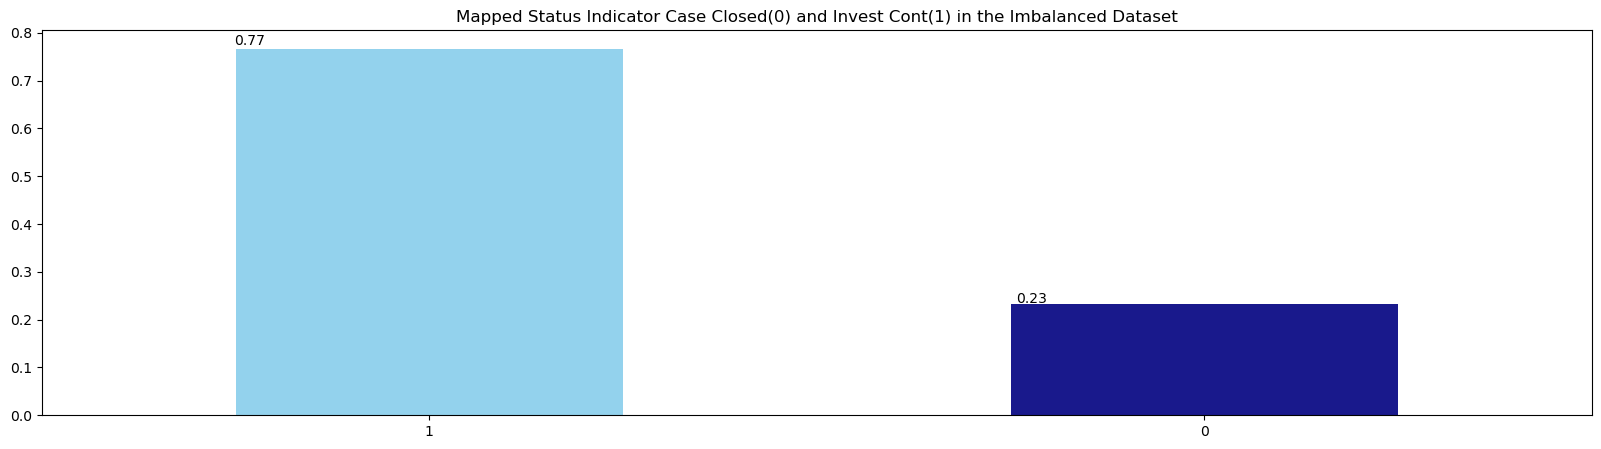

In [14]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (20,5))
ax=cd.Mapped_Status.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)
plt.title('Mapped Status Indicator Case Closed(0) and Invest Cont(1) in the Imbalanced Dataset')
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.show()

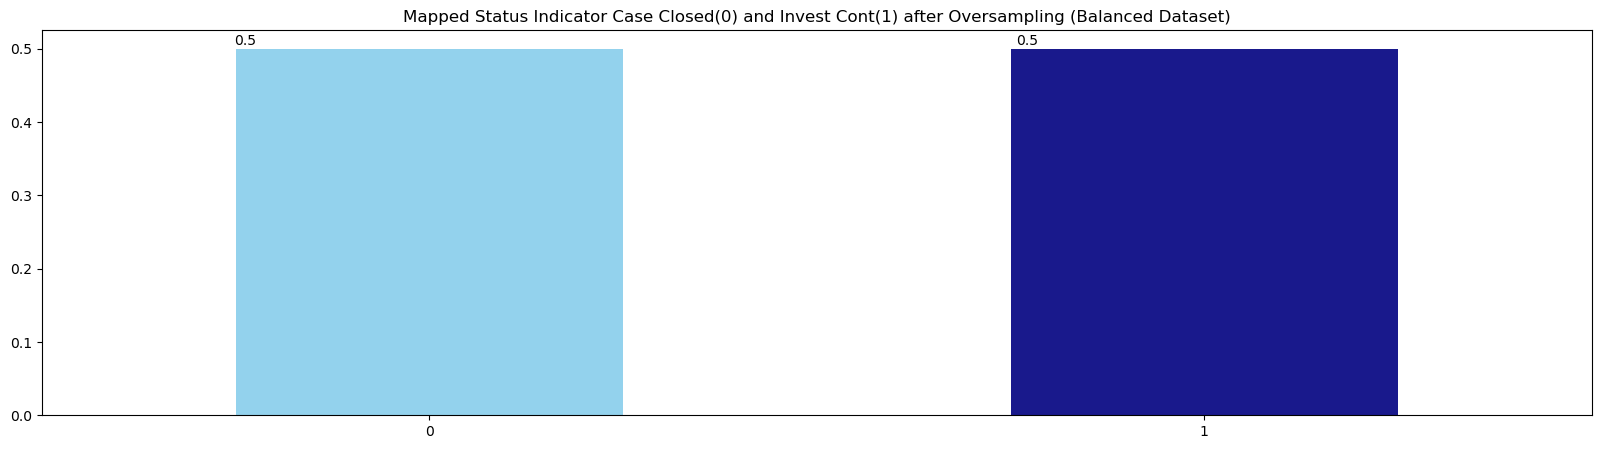

In [15]:
from sklearn.utils import resample

Case_Closed = cd[cd.Mapped_Status == 0]
Invest_Cont = cd[cd.Mapped_Status == 1]
Invest_Cont_oversampled = resample(Invest_Cont, replace=True, n_samples=len(Case_Closed), random_state=42)
oversampled = pd.concat([Case_Closed, Invest_Cont_oversampled])

fig = plt.figure(figsize = (20,5))
ax=oversampled.Mapped_Status.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)
plt.title('Mapped Status Indicator Case Closed(0) and Invest Cont(1) after Oversampling (Balanced Dataset)')
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.show()

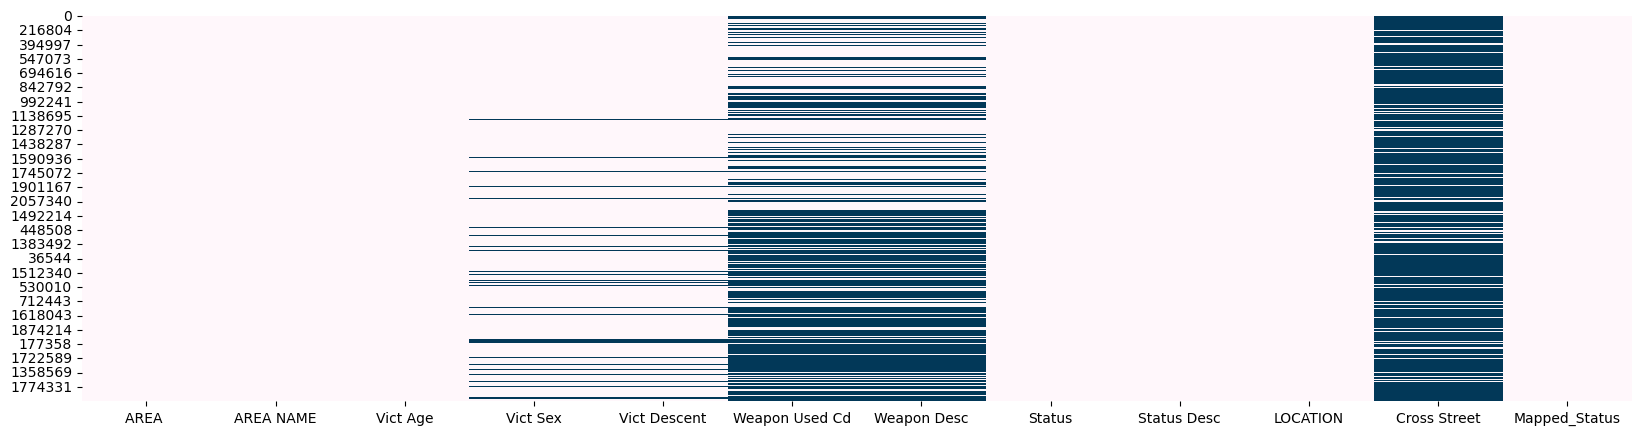

In [16]:
# Missing Data Pattern in Training Data
import seaborn as sns
plt.figure(figsize = (20,5))
sns.heatmap(oversampled.isnull(), cbar=False, cmap='PuBu')
plt.show()

In [17]:
total = oversampled.isnull().sum().sort_values(ascending=False)
percent = (oversampled.isnull().sum()/oversampled.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing

,Total,Percent
Cross Street,832205,0.835905
Weapon Used Cd,554556,0.557021
Weapon Desc,554556,0.557021
Vict Descent,70930,0.071245
Vict Sex,70901,0.071216
Status,3,0.000003
AREA,0,0.000000
AREA NAME,0,0.000000
Vict Age,0,0.000000
Status Desc,0,0.000000


In [18]:
oversampled.select_dtypes(include=['object']).columns

Index(['AREA NAME', 'Vict Sex', 'Vict Descent', 'Weapon Desc', 'Status',
       'Status Desc', 'LOCATION', 'Cross Street'],
      dtype='object')

In [19]:
# Impute categorical var with Mode
#oversampled['Date Rptd'] = oversampled['Date Rptd'].fillna(oversampled['Date Rptd'].mode()[0])
#oversampled['DATE OCC'] = oversampled['DATE OCC'].fillna(oversampled['DATE OCC'].mode()[0])
oversampled['AREA NAME'] = oversampled['AREA NAME'].fillna(oversampled['AREA NAME'].mode()[0])
#oversampled['Crm Cd Desc'] = oversampled['Crm Cd Desc'].fillna(oversampled['Crm Cd Desc'].mode()[0])
#oversampled['Mocodes'] = oversampled['Mocodes'].fillna(oversampled['Mocodes'].mode()[0])
oversampled['Vict Sex'] = oversampled['Vict Sex'].fillna(oversampled['Vict Sex'].mode()[0])
oversampled['Vict Descent'] = oversampled['Vict Descent'].fillna(oversampled['Vict Descent'].mode()[0])
#oversampled['Premis Desc'] = oversampled['Premis Desc'].fillna(oversampled['Premis Desc'].mode()[0])
oversampled['Weapon Desc'] = oversampled['Weapon Desc'].fillna(oversampled['Weapon Desc'].mode()[0])
oversampled['Status'] = oversampled['Status'].fillna(oversampled['Status'].mode()[0])
oversampled['Status Desc'] = oversampled['Status Desc'].fillna(oversampled['Status Desc'].mode()[0])
oversampled['LOCATION'] = oversampled['LOCATION'].fillna(oversampled['LOCATION'].mode()[0])
oversampled['Cross Street'] = oversampled['Cross Street'].fillna(oversampled['Cross Street'].mode()[0])

In [20]:
# Convert categorical features to continuous features with Label Encoding
from sklearn.preprocessing import LabelEncoder
lencoders = {}
for col in oversampled.select_dtypes(include=['object']).columns:
    lencoders[col] = LabelEncoder()
    oversampled[col] = lencoders[col].fit_transform(oversampled[col])

In [21]:
import warnings
warnings.filterwarnings("ignore")
# Multiple Imputation by Chained Equations
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
MiceImputed = oversampled.copy(deep=True) 
mice_imputer = IterativeImputer()
MiceImputed.iloc[:, :] = mice_imputer.fit_transform(oversampled)

In [22]:
# Detecting outliers with IQR
Q1 = MiceImputed.quantile(0.25)
Q3 = MiceImputed.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

AREA                 10.000000
AREA NAME            10.000000
Vict Age             26.000000
Vict Sex              2.000000
Vict Descent         10.000000
Weapon Used Cd       15.714848
Weapon Desc           0.000000
Status                2.000000
Status Desc           1.000000
LOCATION          31928.000000
Cross Street          0.000000
Mapped_Status         1.000000
dtype: float64


In [23]:
# Removing outliers from the dataset
MiceImputed = MiceImputed[~((MiceImputed < (Q1 - 1.5 * IQR)) |(MiceImputed > (Q3 + 1.5 * IQR))).any(axis=1)]
MiceImputed.shape

(702896, 12)

In [24]:
MiceImputed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 702896 entries, 0 to 1166672
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   AREA            702896 non-null  float64
 1   AREA NAME       702896 non-null  float64
 2   Vict Age        702896 non-null  float64
 3   Vict Sex        702896 non-null  float64
 4   Vict Descent    702896 non-null  float64
 5   Weapon Used Cd  702896 non-null  float64
 6   Weapon Desc     702896 non-null  float64
 7   Status          702896 non-null  float64
 8   Status Desc     702896 non-null  float64
 9   LOCATION        702896 non-null  float64
 10  Cross Street    702896 non-null  float64
 11  Mapped_Status   702896 non-null  float64
dtypes: float64(12)
memory usage: 69.7 MB


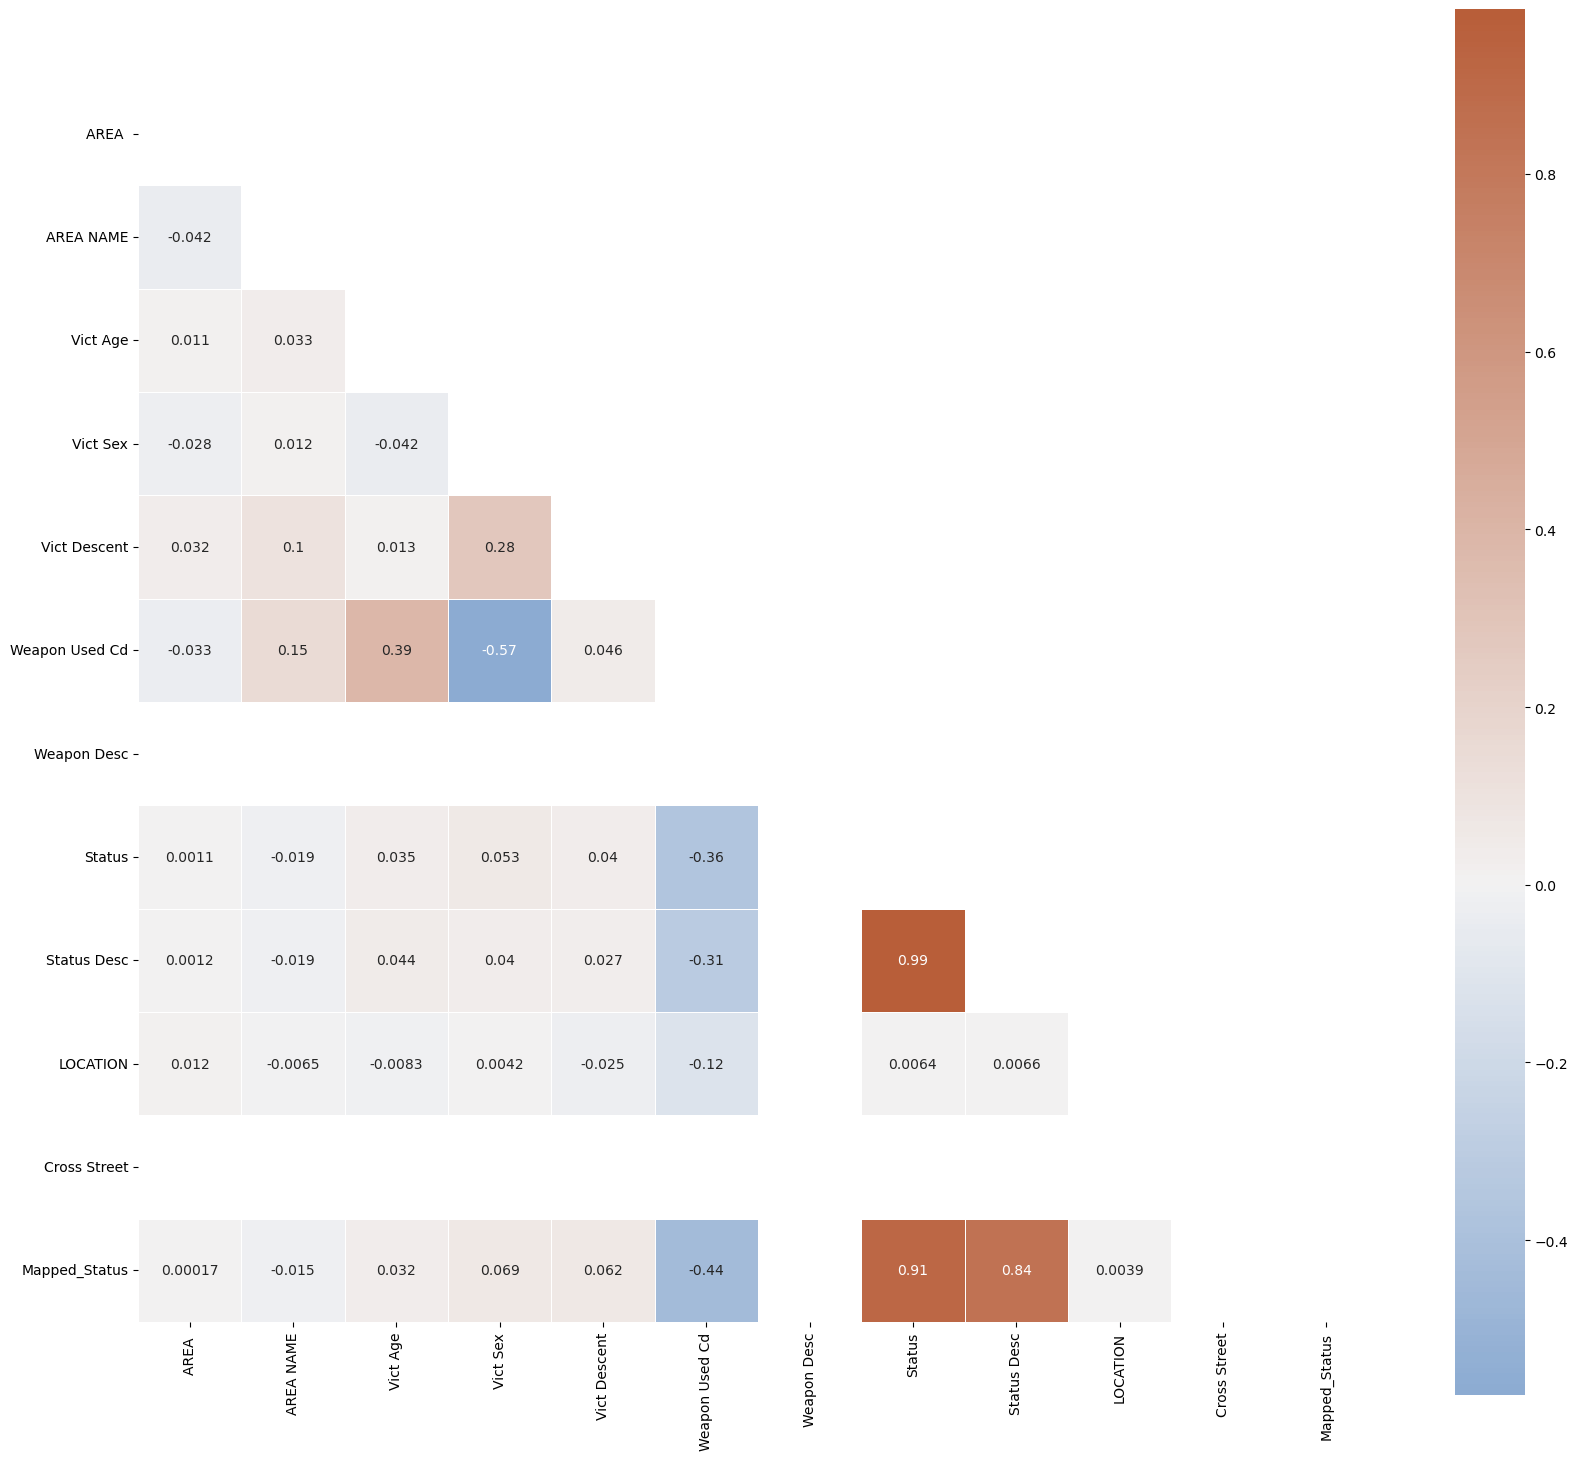

In [25]:
# Correlation Heatmap
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
corr = MiceImputed.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(20,20))
cmap = sns.diverging_palette(250, 25, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=None, center=0,square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .9})
plt.show()

In [26]:
# Standardizing data
from sklearn import preprocessing
r_scaler = preprocessing.MinMaxScaler()
r_scaler.fit(MiceImputed)
modified_data = pd.DataFrame(r_scaler.transform(MiceImputed), index=MiceImputed.index, columns=MiceImputed.columns)

In [27]:
# Feature Importance using Filter Method (Chi-Square)
from sklearn.feature_selection import SelectKBest, chi2
X = modified_data.loc[:,modified_data.columns!='Mapped_Status']
y = modified_data[['Mapped_Status']]
selector = SelectKBest(chi2, k=10)
selector.fit(X, y)
X_new = selector.transform(X)
print(X.columns[selector.get_support(indices=True)])

Index(['AREA ', 'AREA NAME', 'Vict Age', 'Vict Sex', 'Vict Descent',
       'Weapon Used Cd', 'Status', 'Status Desc', 'LOCATION', 'Cross Street'],
      dtype='object')


In [28]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as rf

X = MiceImputed.drop('Mapped_Status', axis=1)
y = MiceImputed['Mapped_Status']
selector = SelectFromModel(rf(n_estimators=100, random_state=0))
selector.fit(X, y)
support = selector.get_support()
features = X.loc[:,support].columns.tolist()
print(features)
print(rf(n_estimators=100, random_state=0).fit(X,y).feature_importances_)

['Status', 'Status Desc']
[1.32489317e-04 2.34448284e-04 5.73999500e-03 2.70862337e-03
 2.02586378e-03 6.38508886e-02 0.00000000e+00 4.61412417e-01
 4.63791819e-01 1.03455450e-04 0.00000000e+00]


In [29]:
features = MiceImputed[['Weapon Used Cd', 'Weapon Desc', 'Vict Descent', 'Vict Sex', 'AREA NAME', 'Vict Age']]
target = MiceImputed['Mapped_Status']

# Split into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42,
                                                    shuffle=True, stratify=target)

# Normalize Features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [30]:
def plot_roc_cur(fper, tper):  
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [31]:
import time
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, plot_confusion_matrix, roc_curve, classification_report
def run_model(model, X_train, y_train, X_test, y_test, verbose=True):
    t0=time.time()
    if verbose == False:
        model.fit(X_train,y_train, verbose=0)
    else:
        model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred) 
    coh_kap = cohen_kappa_score(y_test, y_pred)
    time_taken = time.time()-t0
    print("Accuracy = {}".format(accuracy))
    print("ROC Area under Curve = {}".format(roc_auc))
    print("Cohen's Kappa = {}".format(coh_kap))
    print("Time taken = {}".format(time_taken))
    print(classification_report(y_test,y_pred,digits=5))
    
    probs = model.predict_proba(X_test)  
    probs = probs[:, 1]  
    fper, tper, thresholds = roc_curve(y_test, probs) 
    plot_roc_cur(fper, tper)
    
    plot_confusion_matrix(model, X_test, y_test,cmap=plt.cm.Blues, normalize = 'all')
    
    return model, accuracy, roc_auc, coh_kap, time_taken


Accuracy = 0.8200739792289088
ROC Area under Curve = 0.816289134461204
Cohen's Kappa = 0.6361713208783739
Time taken = 2.55987286567688
              precision    recall  f1-score   support

         0.0    0.83367   0.76436   0.79751     65167
         1.0    0.81002   0.86822   0.83811     75413

    accuracy                        0.82007    140580
   macro avg    0.82185   0.81629   0.81781    140580
weighted avg    0.82099   0.82007   0.81929    140580



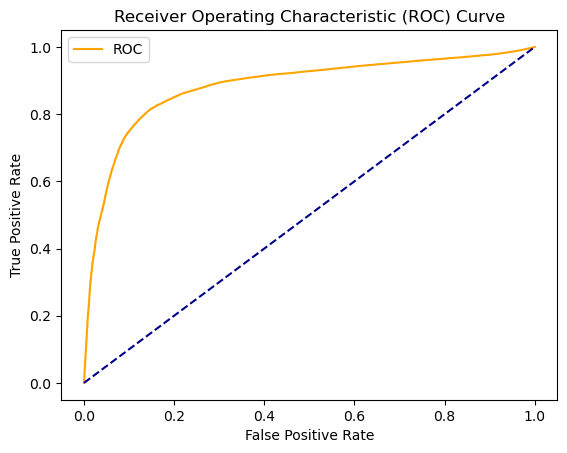

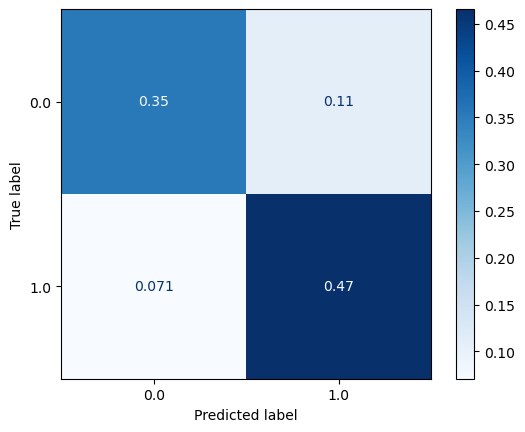

In [32]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

params_lr = {'penalty': 'l1', 'solver':'liblinear'}

model_lr = LogisticRegression(**params_lr)
model_lr, accuracy_lr, roc_auc_lr, coh_kap_lr, tt_lr = run_model(model_lr, X_train, y_train, X_test, y_test)

Accuracy = 0.8961232038696827
ROC Area under Curve = 0.8982397074312961
Cohen's Kappa = 0.7922468385782633
Time taken = 1.6455559730529785
              precision    recall  f1-score   support

         0.0    0.85967   0.92728   0.89220     65167
         1.0    0.93258   0.86920   0.89977     75413

    accuracy                        0.89612    140580
   macro avg    0.89612   0.89824   0.89599    140580
weighted avg    0.89878   0.89612   0.89626    140580



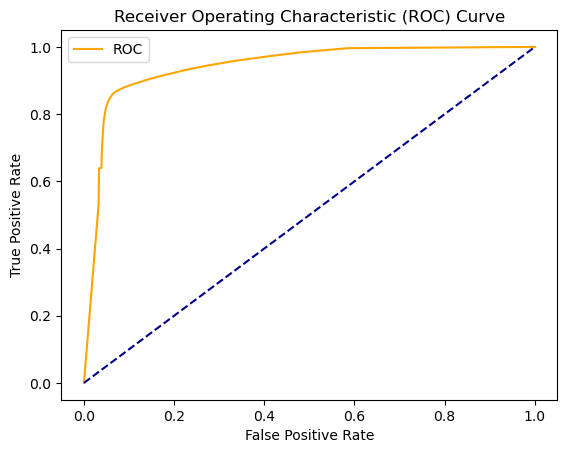

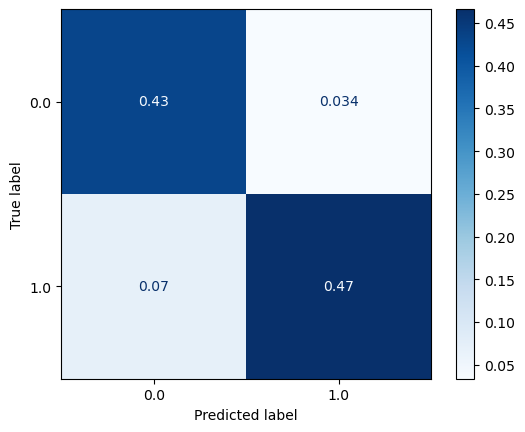

In [33]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

params_dt = {'max_depth': 16,
             'max_features': "sqrt"}

model_dt = DecisionTreeClassifier(**params_dt)
model_dt, accuracy_dt, roc_auc_dt, coh_kap_dt, tt_dt = run_model(model_dt, X_train, y_train, X_test, y_test)

Accuracy = 0.916695120216247
ROC Area under Curve = 0.9211668986457743
Cohen's Kappa = 0.8341315138398182
Time taken = 1162.853485584259
              precision    recall  f1-score   support

         0.0    0.85828   0.98252   0.91621     65167
         1.0    0.98274   0.85981   0.91717     75413

    accuracy                        0.91670    140580
   macro avg    0.92051   0.92117   0.91669    140580
weighted avg    0.92505   0.91670   0.91673    140580



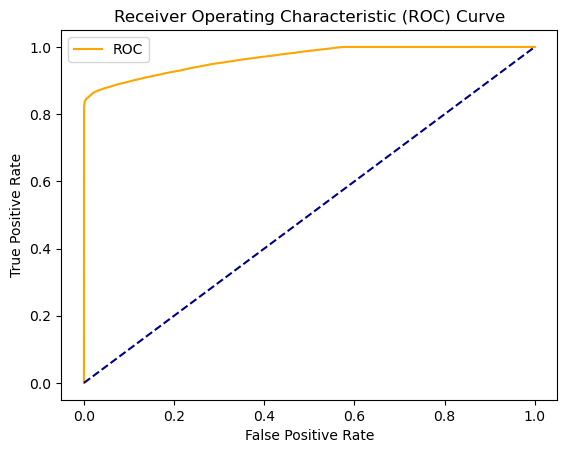

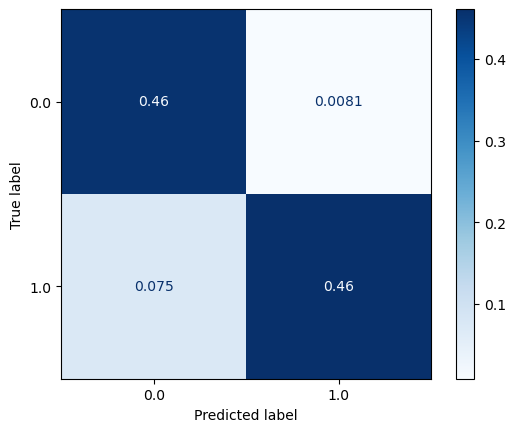

In [34]:
# Neural Network
from sklearn.neural_network import MLPClassifier

params_nn = {'hidden_layer_sizes': (30,30,30),
             'activation': 'logistic',
             'solver': 'lbfgs',
             'max_iter': 500}

model_nn = MLPClassifier(**params_nn)
model_nn, accuracy_nn, roc_auc_nn, coh_kap_nn, tt_nn = run_model(model_nn, X_train, y_train, X_test, y_test)

Accuracy = 0.9067506046379286
ROC Area under Curve = 0.9083755402891135
Cohen's Kappa = 0.8132979381547639
Time taken = 108.45438051223755
              precision    recall  f1-score   support

         0.0    0.87592   0.93067   0.90247     65167
         1.0    0.93667   0.88608   0.91067     75413

    accuracy                        0.90675    140580
   macro avg    0.90630   0.90838   0.90657    140580
weighted avg    0.90851   0.90675   0.90687    140580



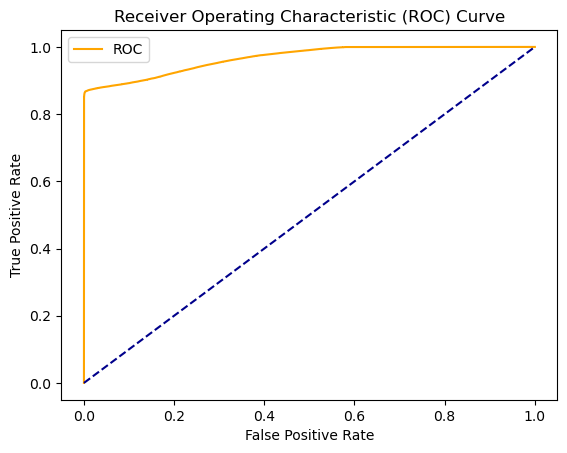

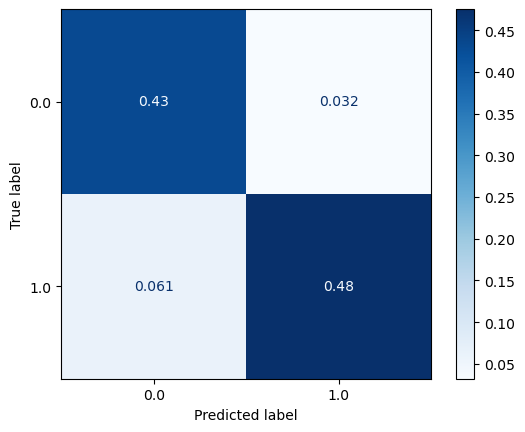

In [36]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

params_rf = {'max_depth': 16,
             'min_samples_leaf': 1,
             'min_samples_split': 2,
             'n_estimators': 100,
             'random_state': 42}

model_rf = RandomForestClassifier(**params_rf)
model_rf, accuracy_rf, roc_auc_rf, coh_kap_rf, tt_rf = run_model(model_rf, X_train, y_train, X_test, y_test)

Accuracy = 0.886505904111538
ROC Area under Curve = 0.8857554211552746
Cohen's Kappa = 0.7717336846121873
Time taken = 86.25108480453491
              precision    recall  f1-score   support

         0.0    0.87920   0.87546   0.87732     65167
         1.0    0.89277   0.89605   0.89441     75413

    accuracy                        0.88651    140580
   macro avg    0.88598   0.88576   0.88587    140580
weighted avg    0.88648   0.88651   0.88649    140580



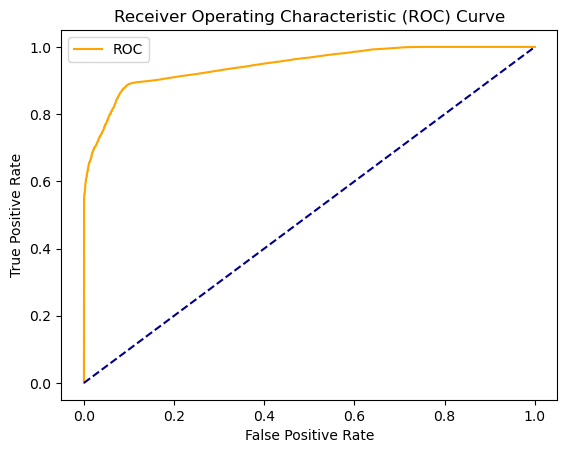

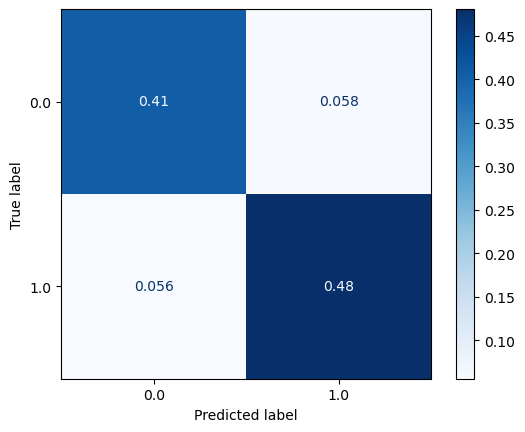

In [35]:
# Catboost
!pip install catboost
import catboost as cb
params_cb ={'iterations': 50,
            'max_depth': 16}

model_cb = cb.CatBoostClassifier(**params_cb)
model_cb, accuracy_cb, roc_auc_cb, coh_kap_cb, tt_cb = run_model(model_cb, X_train, y_train, X_test, y_test, verbose=False)

In [37]:
MiceImputed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 702896 entries, 0 to 1166672
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   AREA            702896 non-null  float64
 1   AREA NAME       702896 non-null  float64
 2   Vict Age        702896 non-null  float64
 3   Vict Sex        702896 non-null  float64
 4   Vict Descent    702896 non-null  float64
 5   Weapon Used Cd  702896 non-null  float64
 6   Weapon Desc     702896 non-null  float64
 7   Status          702896 non-null  float64
 8   Status Desc     702896 non-null  float64
 9   LOCATION        702896 non-null  float64
 10  Cross Street    702896 non-null  float64
 11  Mapped_Status   702896 non-null  float64
dtypes: float64(12)
memory usage: 69.7 MB


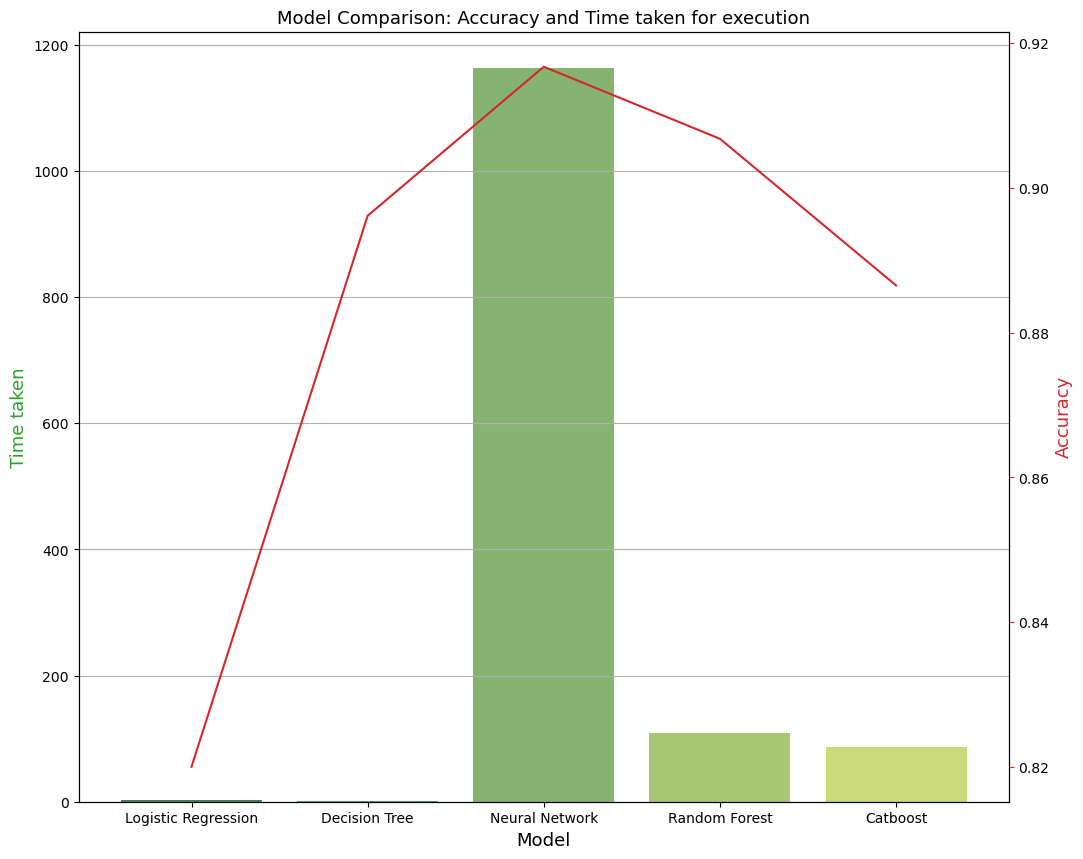

In [38]:
accuracy_scores = [accuracy_lr, accuracy_dt, accuracy_nn, accuracy_rf, accuracy_cb]
roc_auc_scores = [roc_auc_lr, roc_auc_dt, roc_auc_nn, roc_auc_rf, roc_auc_cb]
coh_kap_scores = [coh_kap_lr, coh_kap_dt, coh_kap_nn, coh_kap_rf, coh_kap_cb]
tt = [tt_lr, tt_dt, tt_nn, tt_rf, tt_cb]

model_data = {'Model': ['Logistic Regression','Decision Tree','Neural Network','Random Forest','Catboost'],
              'Accuracy': accuracy_scores,
              'ROC_AUC': roc_auc_scores,
              'Cohen_Kappa': coh_kap_scores,
              'Time taken': tt}
data = pd.DataFrame(model_data)

fig, ax1 = plt.subplots(figsize=(12,10))
ax1.set_title('Model Comparison: Accuracy and Time taken for execution', fontsize=13)
color = 'tab:green'
ax1.grid()
ax1.set_xlabel('Model', fontsize=13)
ax1.set_ylabel('Time taken', fontsize=13, color=color)
ax2 = sns.barplot(x='Model', y='Time taken', data = data, palette='summer')
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Accuracy', fontsize=13, color=color)
ax2 = sns.lineplot(x='Model', y='Accuracy', data = data, sort=False, color=color)
ax2.tick_params(axis='y', color=color)

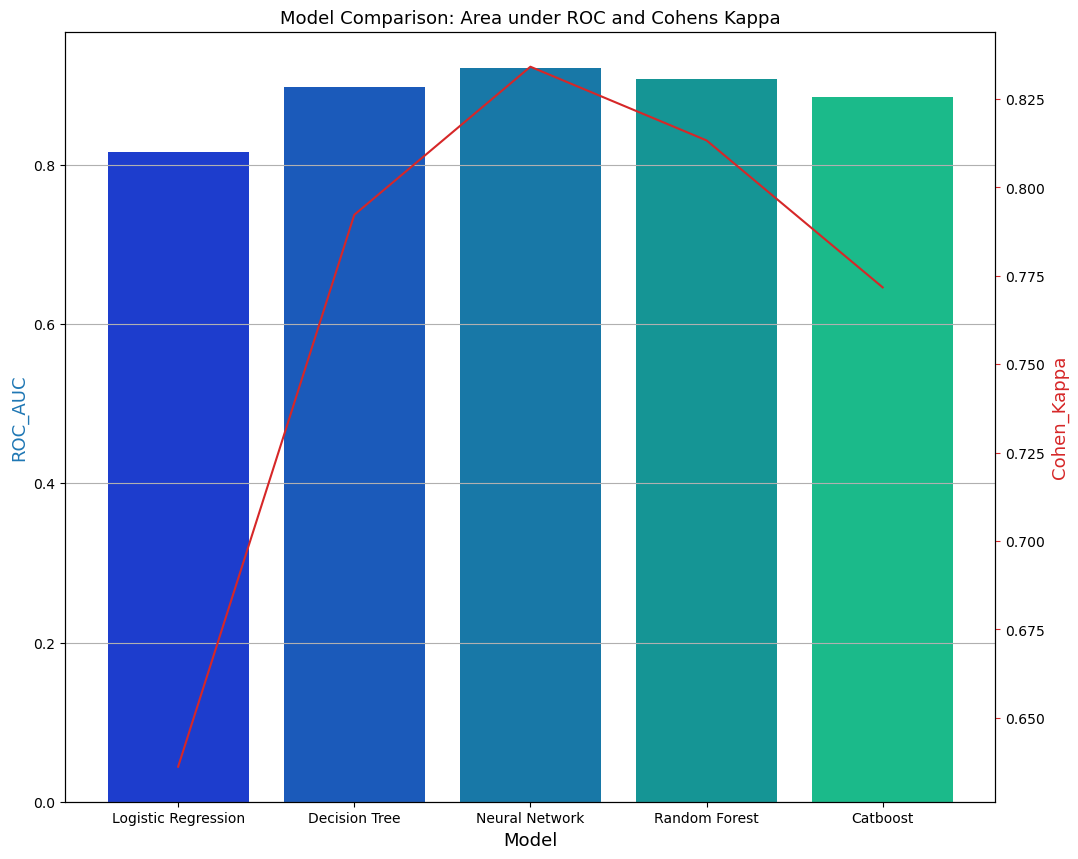

In [39]:
fig, ax3 = plt.subplots(figsize=(12,10))
ax3.set_title('Model Comparison: Area under ROC and Cohens Kappa', fontsize=13)
color = 'tab:blue'
ax3.grid()
ax3.set_xlabel('Model', fontsize=13)
ax3.set_ylabel('ROC_AUC', fontsize=13, color=color)
ax4 = sns.barplot(x='Model', y='ROC_AUC', data = data, palette='winter')
ax3.tick_params(axis='y')
ax4 = ax3.twinx()
color = 'tab:red'
ax4.set_ylabel('Cohen_Kappa', fontsize=13, color=color)
ax4 = sns.lineplot(x='Model', y='Cohen_Kappa', data = data, sort=False, color=color)
ax4.tick_params(axis='y', color=color)
plt.show()